# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import wkey

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
name = []
lat = []
lon = []
temp = []
humidity = []
cloud = []
wind = []
country = []
date = []
record = 0
set = 1
url = "http://api.openweathermap.org/data/2.5/weather?"

print('Beginning Data Retrieval')
print('-------------------------------------')

for city in cities:
    query_url = url + "appid=" + wkey + "&q=" + city + "&units=imperial"
    if record<50:
        response = requests.get(query_url).json()
        try:
            lat.append(response['coord']['lat'])
            lon.append(response['coord']['lon'])
            temp.append(response['main']['temp_max'])
            humidity.append(response['main']['humidity'])
            cloud.append(response['clouds']['all'])
            wind.append(response['wind']['speed'])
            country.append(response['sys']['country'])
            date.append(response['dt'])
            name.append(city)
            record +=1
            print(f'Processing Record {record} of set {set} | {city}')
        except:
            print('City not found. Skipping...')
    else:
        set +=1
        record = 0
        time.sleep(60)

print('-------------------------------------')
print('Data Retrieval Complete')
print('-------------------------------------')

Beginning Data Retrieval
-------------------------------------
Processing Record 1 of set 1 | pevek
City not found. Skipping...
Processing Record 2 of set 1 | chokurdakh
Processing Record 3 of set 1 | mar del plata
Processing Record 4 of set 1 | tura
Processing Record 5 of set 1 | belmonte
Processing Record 6 of set 1 | ushuaia
Processing Record 7 of set 1 | cam ranh
Processing Record 8 of set 1 | castro
Processing Record 9 of set 1 | norman wells
Processing Record 10 of set 1 | pidhorodne
Processing Record 11 of set 1 | jamestown
Processing Record 12 of set 1 | guatire
Processing Record 13 of set 1 | victoria
Processing Record 14 of set 1 | urumqi
Processing Record 15 of set 1 | ostrovnoy
Processing Record 16 of set 1 | bengkulu
Processing Record 17 of set 1 | qaanaaq
Processing Record 18 of set 1 | bredasdorp
Processing Record 19 of set 1 | yinchuan
Processing Record 20 of set 1 | cape town
City not found. Skipping...
Processing Record 21 of set 1 | tuatapere
Processing Record 22 of 

Processing Record 38 of set 4 | martil
Processing Record 39 of set 4 | myitkyina
Processing Record 40 of set 4 | kaitangata
Processing Record 41 of set 4 | sinnamary
Processing Record 42 of set 4 | paragominas
Processing Record 43 of set 4 | kurayoshi
Processing Record 44 of set 4 | nha trang
Processing Record 45 of set 4 | beringovskiy
Processing Record 46 of set 4 | skibbereen
Processing Record 47 of set 4 | itarema
Processing Record 48 of set 4 | imbituba
Processing Record 49 of set 4 | giddarbaha
City not found. Skipping...
Processing Record 50 of set 4 | fare
Processing Record 1 of set 5 | helong
Processing Record 2 of set 5 | cotonou
Processing Record 3 of set 5 | vardo
City not found. Skipping...
Processing Record 4 of set 5 | sakakah
Processing Record 5 of set 5 | bethel
Processing Record 6 of set 5 | kirakira
Processing Record 7 of set 5 | asuncion
Processing Record 8 of set 5 | rawson
Processing Record 9 of set 5 | daru
Processing Record 10 of set 5 | korla
Processing Record 

Processing Record 26 of set 8 | alice springs
Processing Record 27 of set 8 | maniitsoq
Processing Record 28 of set 8 | iqaluit
City not found. Skipping...
Processing Record 29 of set 8 | salalah
Processing Record 30 of set 8 | zheleznodorozhnyy
Processing Record 31 of set 8 | tallahassee
Processing Record 32 of set 8 | maldonado
Processing Record 33 of set 8 | cumberland
Processing Record 34 of set 8 | lola
Processing Record 35 of set 8 | wasco
Processing Record 36 of set 8 | olga
Processing Record 37 of set 8 | harer
City not found. Skipping...
Processing Record 38 of set 8 | canon city
Processing Record 39 of set 8 | leh
Processing Record 40 of set 8 | belen
Processing Record 41 of set 8 | rovnoye
Processing Record 42 of set 8 | fort nelson
Processing Record 43 of set 8 | nanma
City not found. Skipping...
Processing Record 44 of set 8 | la ronge
Processing Record 45 of set 8 | didwana
Processing Record 46 of set 8 | hays
Processing Record 47 of set 8 | new haven
Processing Record 48

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
print(len(name), len(lat), len(lon), len(temp), len(humidity), len(cloud), len(wind), len(country), len(date))

542 542 542 542 542 542 542 542 542


In [6]:
weather_dict = {'City': name,
              'Latitude': lat,
              'Longitude': lon,
              'Max-Temp': temp,
              'Humidity': humidity,
              'Cloudiness': cloud,
              'Wind Speed': wind,
              'Country': country,
               'Date': date}
weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv(output_data_file)
weather_data.head()

,City,Latitude,Longitude,Max-Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pevek,69.7008,170.3133,22.55,89,100,8.81,RU,1619396742
1,chokurdakh,70.6333,147.9167,24.15,94,100,13.96,RU,1619396839
2,mar del plata,-38.0023,-57.5575,61.00,88,20,3.44,AR,1619396765
3,tura,25.5198,90.2201,75.78,30,2,4.34,IN,1619396412
4,belmonte,-15.8631,-38.8828,77.00,83,20,5.75,BR,1619396423


In [8]:
summary = weather_data[['Latitude', 'Longitude', 'Max-Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Date']]
summary.describe()

,Latitude,Longitude,Max-Temp,Humidity,Cloudiness,Wind Speed,Date
count,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,5.420000e+02
mean,17.916167,17.678235,61.527675,68.487085,53.998155,7.349244,1.619397e+09
std,33.097785,89.911632,18.492815,23.151251,39.549379,5.478494,3.296649e+02
min,-54.800000,-179.166700,3.900000,6.000000,0.000000,0.400000,1.619396e+09
25%,-9.856700,-59.257225,48.200000,54.250000,15.500000,3.440000,1.619397e+09
50%,20.082650,22.492300,63.000000,74.000000,68.000000,5.915000,1.619397e+09
75%,44.420950,93.512525,77.015000,87.000000,95.000000,10.092500,1.619397e+09
max,78.218600,179.316700,91.670000,100.000000,100.000000,44.870000,1.619398e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
According to the code below, there are no cities in the dataset with humidity over 100%. 

In [23]:
outliers = weather_data.loc[weather_data['Humidity'] > 100]
outliers

,City,Latitude,Longitude,Max-Temp,Humidity,Cloudiness,Wind Speed,Country,Date


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

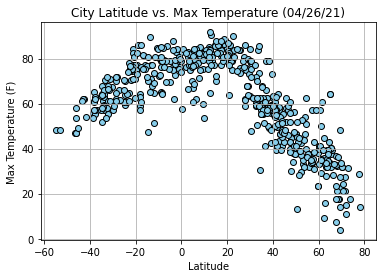

In [17]:
plt.title('City Latitude vs. Max Temperature (04/26/21)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.scatter(weather_data.Latitude, weather_data['Max-Temp'], color='skyblue', edgecolor='black')
plt.grid()
plt.show()

In the scatter plot above, we can see temperature is highest around the equator (0 latitude). As we move away from the equator, either North or South, the temperature decreases.

## Latitude vs. Humidity Plot

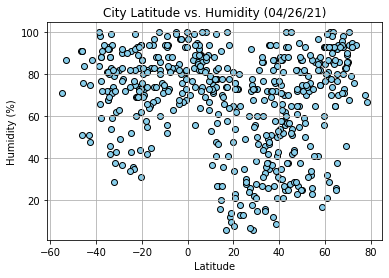

In [16]:
plt.title('City Latitude vs. Humidity (04/26/21)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.scatter(weather_data.Latitude, weather_data.Humidity, color='skyblue', edgecolor='black', )
plt.grid()
plt.show()

This scatter plot indicates humidity is not affected by latitude.

## Latitude vs. Cloudiness Plot

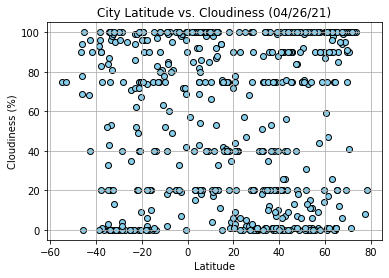

In [18]:
plt.title('City Latitude vs. Cloudiness (04/26/21)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.scatter(weather_data.Latitude, weather_data.Cloudiness, color='skyblue', edgecolor='black', )
plt.grid()
plt.show()

There appears to no correlation between latitude and cloudiness.

## Latitude vs. Wind Speed Plot

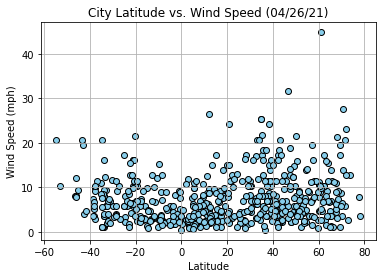

In [19]:
plt.title('City Latitude vs. Wind Speed (04/26/21)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.scatter(weather_data.Latitude, weather_data['Wind Speed'], color='skyblue', edgecolor='black', )
plt.grid()
plt.show()

Wind speeds appear to be concentrated below 10 mph for all latitudes.

## Linear Regression

In [25]:
northern_hemisphere = weather_data.loc[weather_data['Latitude']>=0]
southern_hemisphere = weather_data.loc[weather_data['Latitude']<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is -0.8739017062404373.


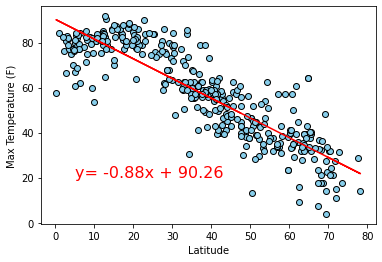

In [30]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere.Latitude, northern_hemisphere['Max-Temp'])
regress_values = northern_hemisphere.Latitude * slope + intercept
line_eq = (f'y= {str(round(slope,2))}x + {str(round(intercept,2))}')

print(f'The r value is {rvalue}.')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.scatter(northern_hemisphere.Latitude, northern_hemisphere['Max-Temp'], color='skyblue', edgecolor='black')
plt.plot(northern_hemisphere.Latitude,regress_values, color='r')
plt.annotate(line_eq, (5,20), fontsize=16, color='r')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is 0.7236248031917739.


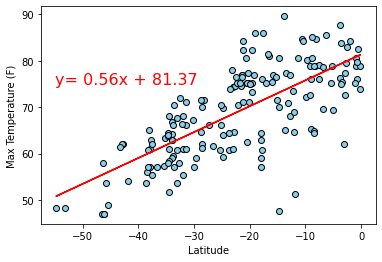

In [37]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere.Latitude, southern_hemisphere['Max-Temp'])
regress_values = southern_hemisphere.Latitude * slope + intercept
line_eq = (f'y= {str(round(slope,2))}x + {str(round(intercept,2))}')

print(f'The r value is {rvalue}.')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.scatter(southern_hemisphere.Latitude, southern_hemisphere['Max-Temp'], color='skyblue', edgecolor='black')
plt.plot(southern_hemisphere.Latitude,regress_values, color='r')
plt.annotate(line_eq, ((-55),75), fontsize=16, color='r')
plt.show()

In the above two graphs we see a very strong correlation between latitude and temperature. Both graphs depict what happens to the temperature as we move further North. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is 0.07359818759984485.


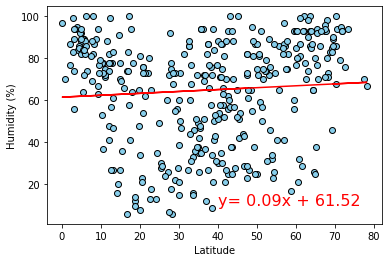

In [41]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere.Latitude, northern_hemisphere.Humidity)
regress_values = northern_hemisphere.Latitude * slope + intercept
line_eq = (f'y= {str(round(slope,2))}x + {str(round(intercept,2))}')

print(f'The r value is {rvalue}.')

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.scatter(northern_hemisphere.Latitude, northern_hemisphere.Humidity, color='skyblue', edgecolor='black', )
plt.plot(northern_hemisphere.Latitude,regress_values, color='r')
plt.annotate(line_eq, (40,10), fontsize=16, color='r')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is 0.1365268980098572.


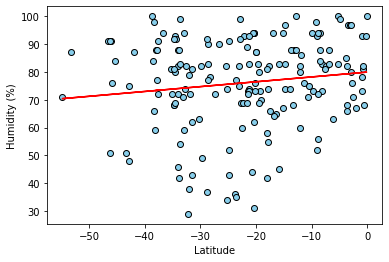

In [42]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere.Latitude, southern_hemisphere.Humidity)
regress_values = southern_hemisphere.Latitude * slope + intercept
line_eq = (f'y= {str(round(slope,2))}x + {str(round(intercept,2))}')

print(f'The r value is {rvalue}.')

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.scatter(southern_hemisphere.Latitude, southern_hemisphere.Humidity, color='skyblue', edgecolor='black', )
plt.plot(southern_hemisphere.Latitude,regress_values, color='r')
plt.annotate(line_eq, (40,10), fontsize=16, color='r')
plt.show()

The linear regressions for latitude vs. humidity confirms there is no correlation between the two variables.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


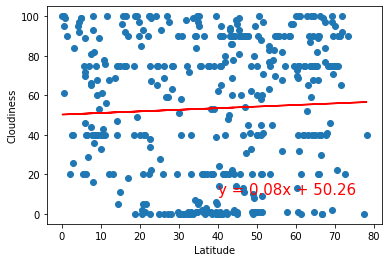

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


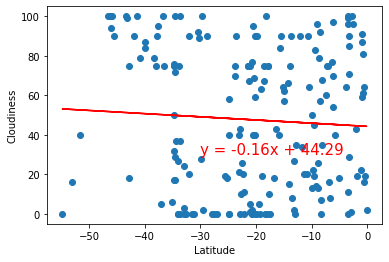

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


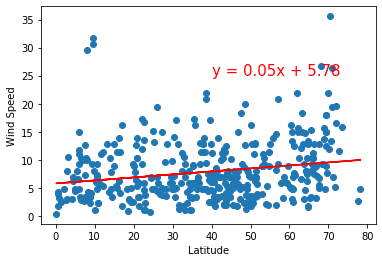

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


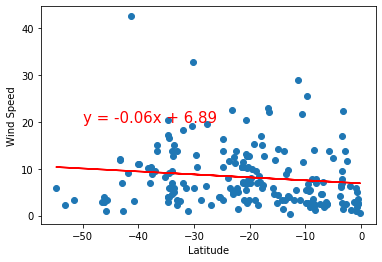